## Part 2: Implementation of the Tiger Problem

Recall from the lecture the Tiger Problem:

![Image](./graphs/tiger_problem.png)
![Image](./graphs/tiger1.png)

As we have discussed in the lecture, the data generated from this example forms a POMDP. As such, the optimal policy is no longer stationary in this case. In this notebook, we will conduct a simulation study to show the advantage of history-dependent policies over the stationary policy. We first derive the form of the optimal stationary policy in this example. 

Given an initial state (the inferred location of the tiger, either L or R), the class of stationary policies can be listed as follows:

1. L $\rightarrow$ Open R; R $\rightarrow$ Open L
2. L $\rightarrow$ Listen; R $\rightarrow$ Open L
3. L $\rightarrow$ Open R; R $\rightarrow$ Listen
4. L $\rightarrow$ Listen; R $\rightarrow$ Listen
5. L $\rightarrow$ Open R; R $\rightarrow$ Open R
6. L $\rightarrow$ Listen; R $\rightarrow$ Open R
7. L $\rightarrow$ Open L; R $\rightarrow$ Listen
8. L $\rightarrow$ Open L; R $\rightarrow$ Open L
9. L $\rightarrow$ Open L; R $\rightarrow$ Open R

The last five policies involve actions to open L (or R) if we hear tiger on the L (or R). As such, these policies are not good. They will yield low rewards. The fourth policy chooses to listen at each time step. Since listenning gives us a reward of -1, it will yield a low reward as well. Among the first three policies, the first policy will give us the largest reward, since the second and third involve listening which gives us a slight penalty. 

To summarize, according to the optimal stationary policy, we will open L (or R) if we hear tiger on the R (or L). In the following, we compare this policy with several history-dependent policies that first chooses to listen $k$ (3,5,7,9,...) many times and then open L (or R) if we hear tiger on the R (or L) most of the times. When $k=1$, it reduces to the optimal stationary policy. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

listen = 0
open_left = 1
open_right = 2

probability_hear_correctly = 0.85
reward_wrong_opening = -100
reward_correct_opening = 10
reward_listening = -1

num_trials = 1000

In [2]:
def step(action, tiger_is_left):
    if action is listen:
        hear_tiger_left = np.random.binomial(1, probability_hear_correctly if tiger_is_left else 1 - probability_hear_correctly)
        return reward_listening, hear_tiger_left
    if action is open_left:
        if tiger_is_left:
            return reward_wrong_opening, None
        else:
            return reward_correct_opening, None
    # action is open_right     
    if tiger_is_left:
        return reward_correct_opening, None
    else:
        return reward_wrong_opening, None 

def run_tiger_problem(num_trials, num_listen):
    total_rewards = np.zeros(num_trials)
    for trial in range(num_trials):
        tiger_is_left = np.random.binomial(1,.5)
        total_reward = 0
        count_hear_left = 0
        count_hear_right = 0
        for _ in range(num_listen): 
            reward, hear_tiger_left = step(listen, tiger_is_left)
            total_reward += reward
            if hear_tiger_left:
                count_hear_left += 1
            else:
                count_hear_right +=1 
        reward, _ = step(open_left if count_hear_left < count_hear_right else  (open_right if count_hear_right < count_hear_left else (open_left if np.random.binomial(1, 0.5) else open_right)), tiger_is_left)
        total_reward += reward
        total_rewards[trial] = total_reward
    return np.mean(total_rewards)

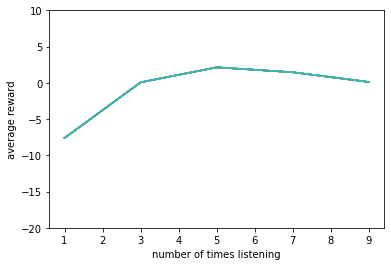

In [3]:
max_count_listen = np.abs(reward_correct_opening / reward_listening).astype(int)
# list_of_listen_counts = list(range(max_count_listen))
list_of_listen_counts = list(range(1,max_count_listen,2))
reward_data = np.zeros((len(list_of_listen_counts),2))
for j,i in enumerate(list_of_listen_counts):
    average_reward = run_tiger_problem(num_trials, i)
    reward_data[j] = [i, average_reward]
    # print("Average return for {} tries is {}".format(i, average_reward))
plt.xlabel('number of times listening')
plt.ylabel('average reward')
plt.ylim(-20,10)
for i in range(max_count_listen):
    plt.plot(reward_data[:,0], reward_data[:,1])
plt.show()